In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk

import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
from tqdm import tqdm_notebook
import os
%matplotlib inline

In [2]:

import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import matplotlib.pyplot as plt   
%matplotlib inline
import re
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

In [4]:
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
import joblib

import keras
import tensorflow as tf
from keras import optimizers, callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.layers import Input, Dropout, Dense

#1.Loading **Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip '/content/drive/My Drive/mercari/test_stg2.tsv.zip'


Archive:  /content/drive/My Drive/mercari/test_stg2.tsv.zip
  inflating: test_stg2.tsv           


In [7]:
train_data=pd.read_csv('/content/drive/My Drive/mercari/train.tsv',sep='\t')
test_data = pd.read_csv('test_stg2.tsv', sep='\t')

In [8]:
print(train_data.shape)
print(test_data.shape)

(1482535, 8)
(3460725, 7)


In [9]:
train_data=train_data[train_data['price']>0]

In [10]:
train_data["log_price"] = np.log(train_data["price"] + 1)
del train_data['price']

In [11]:
#https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
# train_data.loc[:,('sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5')]= train_data['category_name'].str.split('/', 0, expand=True)
train_data[['sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5']] = train_data['category_name'].str.split('/', 0, expand=True)
del train_data['category_name']
train_data.head(1)

,train_id,name,item_condition_id,brand_name,shipping,item_description,log_price,sub_cat1,sub_cat2,sub_cat3,sub_cat4,sub_cat5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,1,No description yet,2.397895,Men,Tops,T-shirts,None,None


In [12]:
test_data[['sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5']] = test_data['category_name'].str.split('/', 0, expand=True)
del test_data['category_name']
test_data.head(1)

,test_id,name,item_condition_id,brand_name,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,sub_cat4,sub_cat5
0,0,"Breast cancer ""I fight like a girl"" ring",1,NaN,1,Size 7,Women,Jewelry,Rings,None,None


In [13]:
# https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names-in-pandas
train_data.drop(['sub_cat4', 'sub_cat5'], axis=1, inplace=True)
test_data.drop(['sub_cat4', 'sub_cat5'], axis=1, inplace=True)

In [14]:
print(train_data.columns)
print(test_data.columns)

Index(['train_id', 'name', 'item_condition_id', 'brand_name', 'shipping',
       'item_description', 'log_price', 'sub_cat1', 'sub_cat2', 'sub_cat3'],
      dtype='object')
Index(['test_id', 'name', 'item_condition_id', 'brand_name', 'shipping',
       'item_description', 'sub_cat1', 'sub_cat2', 'sub_cat3'],
      dtype='object')


In [15]:
train_data['item_description']=train_data['item_description'].fillna('none')
train_data['brand_name']=train_data['brand_name'].fillna('unknown')
train_data['sub_cat1']=train_data['sub_cat1'].fillna('none')
train_data['sub_cat2']=train_data['sub_cat2'].fillna('none')
train_data['sub_cat3']=train_data['sub_cat3'].fillna('none')

test_data['item_description']=test_data['item_description'].fillna('none')
test_data['brand_name']=test_data['brand_name'].fillna('unknown')
test_data['sub_cat1']=test_data['sub_cat1'].fillna('none')
test_data['sub_cat2']=test_data['sub_cat2'].fillna('none')
test_data['sub_cat3']=test_data['sub_cat3'].fillna('none')

In [16]:
train_data.isnull().sum()

train_id             0
name                 0
item_condition_id    0
brand_name           0
shipping             0
item_description     0
log_price            0
sub_cat1             0
sub_cat2             0
sub_cat3             0
dtype: int64

In [17]:
test_data.isnull().sum()

test_id              0
name                 0
item_condition_id    0
brand_name           0
shipping             0
item_description     0
sub_cat1             0
sub_cat2             0
sub_cat3             0
dtype: int64

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('all') 
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [20]:
def counting_stopwords(data):
    count_words=[]
    for i in tqdm(data['item_description']):
        count=0
        for j in i.split(' '):
            if j in stopwords:
                count+=1
        count_words.append(count)
    return count_words
train_data['count_of_stopwords']=counting_stopwords(train_data)
test_data['count_of_stopwords']=counting_stopwords(test_data)

100%|██████████| 3460725/3460725 [00:13<00:00, 259652.89it/s]


In [21]:

# ref - www.appliedaicourse.com/
''' This code performs text processing by cleaning text including 
removing stopwords, reemoving special characters, performing, word decontraction etc. '''

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

def text_preprocess(data):
    preprocessed = []
    # tqdm is for printing the status bar
    for sentance in tqdm_notebook(data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [22]:
train_data['preprocessed_item_des'] = text_preprocess(train_data['item_description'])
test_data['preprocessed_item_des'] = text_preprocess(test_data['item_description'])

In [23]:
train_data['length']=train_data['preprocessed_item_des'].str.len()
test_data['length']=test_data['preprocessed_item_des'].str.len()

In [24]:
def brand_name_category(data):
    cat_brandname=[]
    for i in data['brand_name']:
        if i!='unknown':
            cat_brandname.append(1)
        else:
            cat_brandname.append(0)
    return cat_brandname
    
train_data['brand_name_present']=brand_name_category(train_data)
test_data['brand_name_present']=brand_name_category(test_data)

In [25]:
#we have done stopword removal on item description and obtained new column so now we are remvoing item description and keeping other column
del train_data['item_description']
del test_data['item_description']

splitting the data into train data and cv data

In [26]:
#train_test_split
y=train_data['log_price']

In [27]:
X=train_data.drop(['log_price'], axis=1)

In [28]:
# splitting train internally into train and cv
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.1)

In [29]:
print(X_train.shape , y_train.shape)
print(X_cv.shape    , y_cv.shape)

(1333494, 12) (1333494,)
(148167, 12) (148167,)


In [30]:
t = Tokenizer()
t.fit_on_texts(X_train['name'].tolist())
encoded_docs_X_train_name = t.texts_to_sequences(X_train["name"])
encoded_docs_X_cv_name=t.texts_to_sequences(X_cv['name'])
encoded_docs_X_test_name=t.texts_to_sequences(test_data['name'])

In [31]:
len_docs = []
for doc in X_train['name']:
    splitted_doc = doc.split()
    len_docs.append(len(splitted_doc))
max_len_doc = max(len_docs)
max_length=max_len_doc
print(max_length)

17


In [32]:
padded_docs_X_train_name = pad_sequences(encoded_docs_X_train_name, maxlen=max_length, padding='post')
padded_docs_X_cv_name= pad_sequences(encoded_docs_X_cv_name, maxlen=max_length,padding='post')
padded_docs_X_test_name= pad_sequences(encoded_docs_X_test_name, maxlen=max_length,padding='post')

print(padded_docs_X_train_name.shape)

(1333494, 17)


In [33]:
vocab_size = len(t.word_index) + 1
print(vocab_size)

111677


In [34]:
embeddings_index = dict()
with open('/content/drive/MyDrive/mercari/wiki-news-300d-1M.vec') as f:
    for line in f:
        w_coef = line.rstrip().rsplit(' ')
        word = w_coef[0]
        coefs = np.asarray(w_coef[1:], dtype='float32')
        embeddings_index[word]=coefs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [35]:
print(embedding_matrix.shape)

(111677, 300)


In [36]:
input_layer_name=Input(shape=(max_length,), name='input_layer_name')
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer_name)
x1 = Conv1D(filters=32, kernel_size=3,  padding='same', activation='relu')(embedding_layer)
x1 = MaxPool1D(pool_size=2, padding='same')(x1)
lstm=LSTM(128)(x1)
flatten_1=Flatten()(lstm)

In [37]:
le = LabelEncoder()
le.fit(X_train['sub_cat1'])
X_train_sub_cat1 = le.transform(X_train["sub_cat1"])
X_cv_sub_cat1 = le.transform(X_cv["sub_cat1"])
X_test_sub_cat1 = le.transform(test_data["sub_cat1"])

In [38]:
input_1= Input(shape=(1,), name= 'sub_cat1')
vocab_size_1= X_train['sub_cat1'].nunique()
print(vocab_size_1)
embedding_layer_1 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_1)
flatten_2=Flatten()(embedding_layer_1)

11


In [39]:
le = LabelEncoder()
le.fit(X_train['sub_cat2'])
X_train_sub_cat2 = le.transform(X_train["sub_cat2"])
X_cv_sub_cat2 = le.transform(X_cv["sub_cat2"])
X_test_sub_cat2 = le.transform(test_data["sub_cat2"])

In [40]:
input_2 = Input(shape=(1,), name= 'sub_cat2')
vocab_size_1= X_train['sub_cat2'].nunique()
embedding_layer_2 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_2)
flatten_3=Flatten()(embedding_layer_2)


In [41]:
le = LabelEncoder()
le.fit(X_train['sub_cat3'])

X_cv["sub_cat3"] = X_cv["sub_cat3"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
test_data["sub_cat3"] = test_data["sub_cat3"].map(lambda s: '<unknown>' if s not in le.classes_ else s)

X_train_sub_cat3 = le.transform(X_train["sub_cat3"])
X_cv_sub_cat3 = le.transform(X_cv["sub_cat3"])
X_test_sub_cat3 = le.transform(test_data["sub_cat3"])

In [42]:
input_3 = Input(shape=(1,), name= 'sub_cat3')
vocab_size_1= X_train['sub_cat3'].nunique()
embedding_layer_3 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_3)
flatten_4=Flatten()(embedding_layer_3)


In [43]:
le = LabelEncoder()
le.fit(X_train['brand_name'])

X_cv["brand_name"] = X_cv["brand_name"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
test_data["brand_name"] = test_data["brand_name"].map(lambda s: '<unknown>' if s not in le.classes_ else s)

X_train_brand_name = le.transform(X_train["brand_name"])
X_cv_brand_name = le.transform(X_cv["brand_name"])
X_test_brand_name = le.transform(test_data["brand_name"])

In [44]:
input_4 = Input(shape=(1,), name= 'brand_name')
vocab_size_1= X_train['brand_name'].nunique()
print(vocab_size_1)
embedding_layer_4 = Embedding(input_dim=vocab_size_1+1 ,output_dim=min(vocab_size_1//2,50),input_length=1)(input_4)
flatten_5=Flatten()(embedding_layer_4)


4678


In [46]:
t1 = Tokenizer( )
t1.fit_on_texts(X_train['preprocessed_item_des'].tolist())
encoded_docs_X_train_pre_item_des = t1.texts_to_sequences(X_train["preprocessed_item_des"])
encoded_docs_X_cv_pre_item_des=t1.texts_to_sequences(X_cv['preprocessed_item_des'])
encoded_docs_X_test_pre_item_des=t1.texts_to_sequences(test_data['preprocessed_item_des'])


In [47]:
len_docs = []
for doc in X_train['preprocessed_item_des']:
    splitted_doc = doc.split()
    len_docs.append(len(splitted_doc))
max_len_doc = max(len_docs)
max_length=max_len_doc
print(max_length)

253


In [48]:
padded_docs_X_train_pre_item_des = pad_sequences(encoded_docs_X_train_pre_item_des, maxlen=max_length, padding='post')
padded_docs_X_cv_pre_item_des= pad_sequences(encoded_docs_X_cv_pre_item_des, maxlen=max_length,padding='post')

padded_docs_X_test_pre_item_des= pad_sequences(encoded_docs_X_test_pre_item_des, maxlen=max_length,padding='post')

print(padded_docs_X_train_pre_item_des.shape)

(1333494, 253)


In [49]:
vocab_size=len(t1.word_index)+1
vocab_size

152028

In [50]:
embeddings_index = dict()
with open('/content/drive/MyDrive/mercari/wiki-news-300d-1M.vec') as f:
    for line in f:
        w_coef = line.rstrip().rsplit(' ')
        word = w_coef[0]
        coefs = np.asarray(w_coef[1:], dtype='float32')
        embeddings_index[word]=coefs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [51]:
input_layer_pre_item_des=Input(shape=(max_length,), name='input_layer_item_des_pre')
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer_pre_item_des)
x1 = Conv1D(filters=32, kernel_size=3,  padding='same', activation='relu')(embedding_layer)
x1 = MaxPool1D(pool_size=2, padding='same')(x1)
lstm=LSTM(128)(x1)
flatten_1_2=Flatten()(lstm)

In [52]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['length']).reshape(-1,1))
X_train_len=scaler.transform(np.array(X_train['length']).reshape(-1,1))
X_cv_len=scaler.transform(np.array(X_cv['length']).reshape(-1,1))
test_data_len=scaler.transform(np.array(test_data['length']).reshape(-1,1))
print(X_train_len.shape) 
print(X_cv_len.shape) 
print(test_data_len.shape)

(1333494, 1)
(148167, 1)
(3460725, 1)


In [53]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['count_of_stopwords']).reshape(-1,1))
X_train_stop_count=scaler.transform(np.array(X_train['count_of_stopwords']).reshape(-1,1))
X_cv_stop_count=scaler.transform(np.array(X_cv['count_of_stopwords']).reshape(-1,1))
test_data_stop_count=scaler.transform(np.array(test_data['count_of_stopwords']).reshape(-1,1))
print(X_train_stop_count.shape) 
print(X_cv_stop_count.shape) 
print(test_data_stop_count.shape)

(1333494, 1)
(148167, 1)
(3460725, 1)


In [54]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['item_condition_id']).reshape(-1,1))
X_train_item_condition_id=scaler.transform(np.array(X_train['item_condition_id']).reshape(-1,1))
X_cv_item_condition_id=scaler.transform(np.array(X_cv['item_condition_id']).reshape(-1,1))
test_data_item_condition_id=scaler.transform(np.array(test_data['item_condition_id']).reshape(-1,1))
print(X_train_item_condition_id.shape) 
print(X_cv_item_condition_id.shape) 
print(test_data_item_condition_id.shape)

(1333494, 1)
(148167, 1)
(3460725, 1)


In [55]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['shipping']).reshape(-1,1))
X_train_shipping=scaler.transform(np.array(X_train['shipping']).reshape(-1,1))
X_cv_shipping=scaler.transform(np.array(X_cv['shipping']).reshape(-1,1))
test_data_shipping=scaler.transform(np.array(test_data['shipping']).reshape(-1,1))
print(X_train_shipping.shape) 
print(X_cv_shipping.shape) 
print(test_data_shipping.shape)

(1333494, 1)
(148167, 1)
(3460725, 1)


In [56]:
scaler=StandardScaler()
scaler.fit(np.array(X_train['brand_name_present']).reshape(-1,1))
X_train_brand_name_present=scaler.transform(np.array(X_train['brand_name_present']).reshape(-1,1))
X_cv_brand_name_present=scaler.transform(np.array(X_cv['brand_name_present']).reshape(-1,1))
test_data_brand_name_present=scaler.transform(np.array(test_data['brand_name_present']).reshape(-1,1))
print(X_train_brand_name_present.shape) 
print(X_cv_brand_name_present.shape) 
print(test_data_shipping.shape)

(1333494, 1)
(148167, 1)
(3460725, 1)


In [57]:
X_train_numerical_feat = np.concatenate((X_train_len,X_train_stop_count,X_train_item_condition_id,X_train_shipping,X_train_brand_name_present), axis = 1)
X_cv_numerical_feat= np.concatenate((X_cv_len,X_cv_stop_count,X_cv_item_condition_id,X_cv_shipping,X_cv_brand_name_present), axis = 1)


X_test_numerical_feat= np.concatenate((test_data_len,test_data_stop_count,test_data_item_condition_id,test_data_shipping,test_data_brand_name_present), axis = 1)
print(X_train_numerical_feat.shape,X_cv_numerical_feat.shape,X_test_numerical_feat.shape)

(1333494, 5) (148167, 5) (3460725, 5)


In [58]:
numerical_input= Input(shape=(5,), name='numerical_input')
dense_numerical = Dense(16,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(numerical_input)

In [59]:
concat_layer = concatenate(inputs=[flatten_1,flatten_1_2,flatten_2, flatten_3, flatten_4, flatten_5, dense_numerical], name='concat')

# adding the dense layers and dropout layers as per given diagram
x = Dense(units=100, activation='relu', kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), name='layer1')(concat_layer)
x = Dropout(0.4)(x)
x=BatchNormalization()(x)
x = Dense(units=50, activation='relu', kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), name='layer2')(x)
x = Dropout(0.3)(x)
x=BatchNormalization()(x)

x = Dense(units=10, activation='relu', kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), name='layer3')(x) #0.001
# output = Dense(units=2, activation='softmax', kernel_initializer='he_normal', name='output')(x)
output = Dense(1, activation='linear')(x)
model= Model(inputs=[input_layer_name,input_layer_pre_item_des,input_1,input_2,input_3,input_4,numerical_input], outputs=output)

In [60]:
# https://www.kaggle.com/marknagelberg/rmsle-function
import math
def rmsle(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [61]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_name (InputLayer)   [(None, 17)]         0                                            
__________________________________________________________________________________________________
input_layer_item_des_pre (Input [(None, 253)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 17, 300)      33503100    input_layer_name[0][0]           
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 253, 300)     45608400    input_layer_item_des_pre[0][0]   
______________________________________________________________________________________________

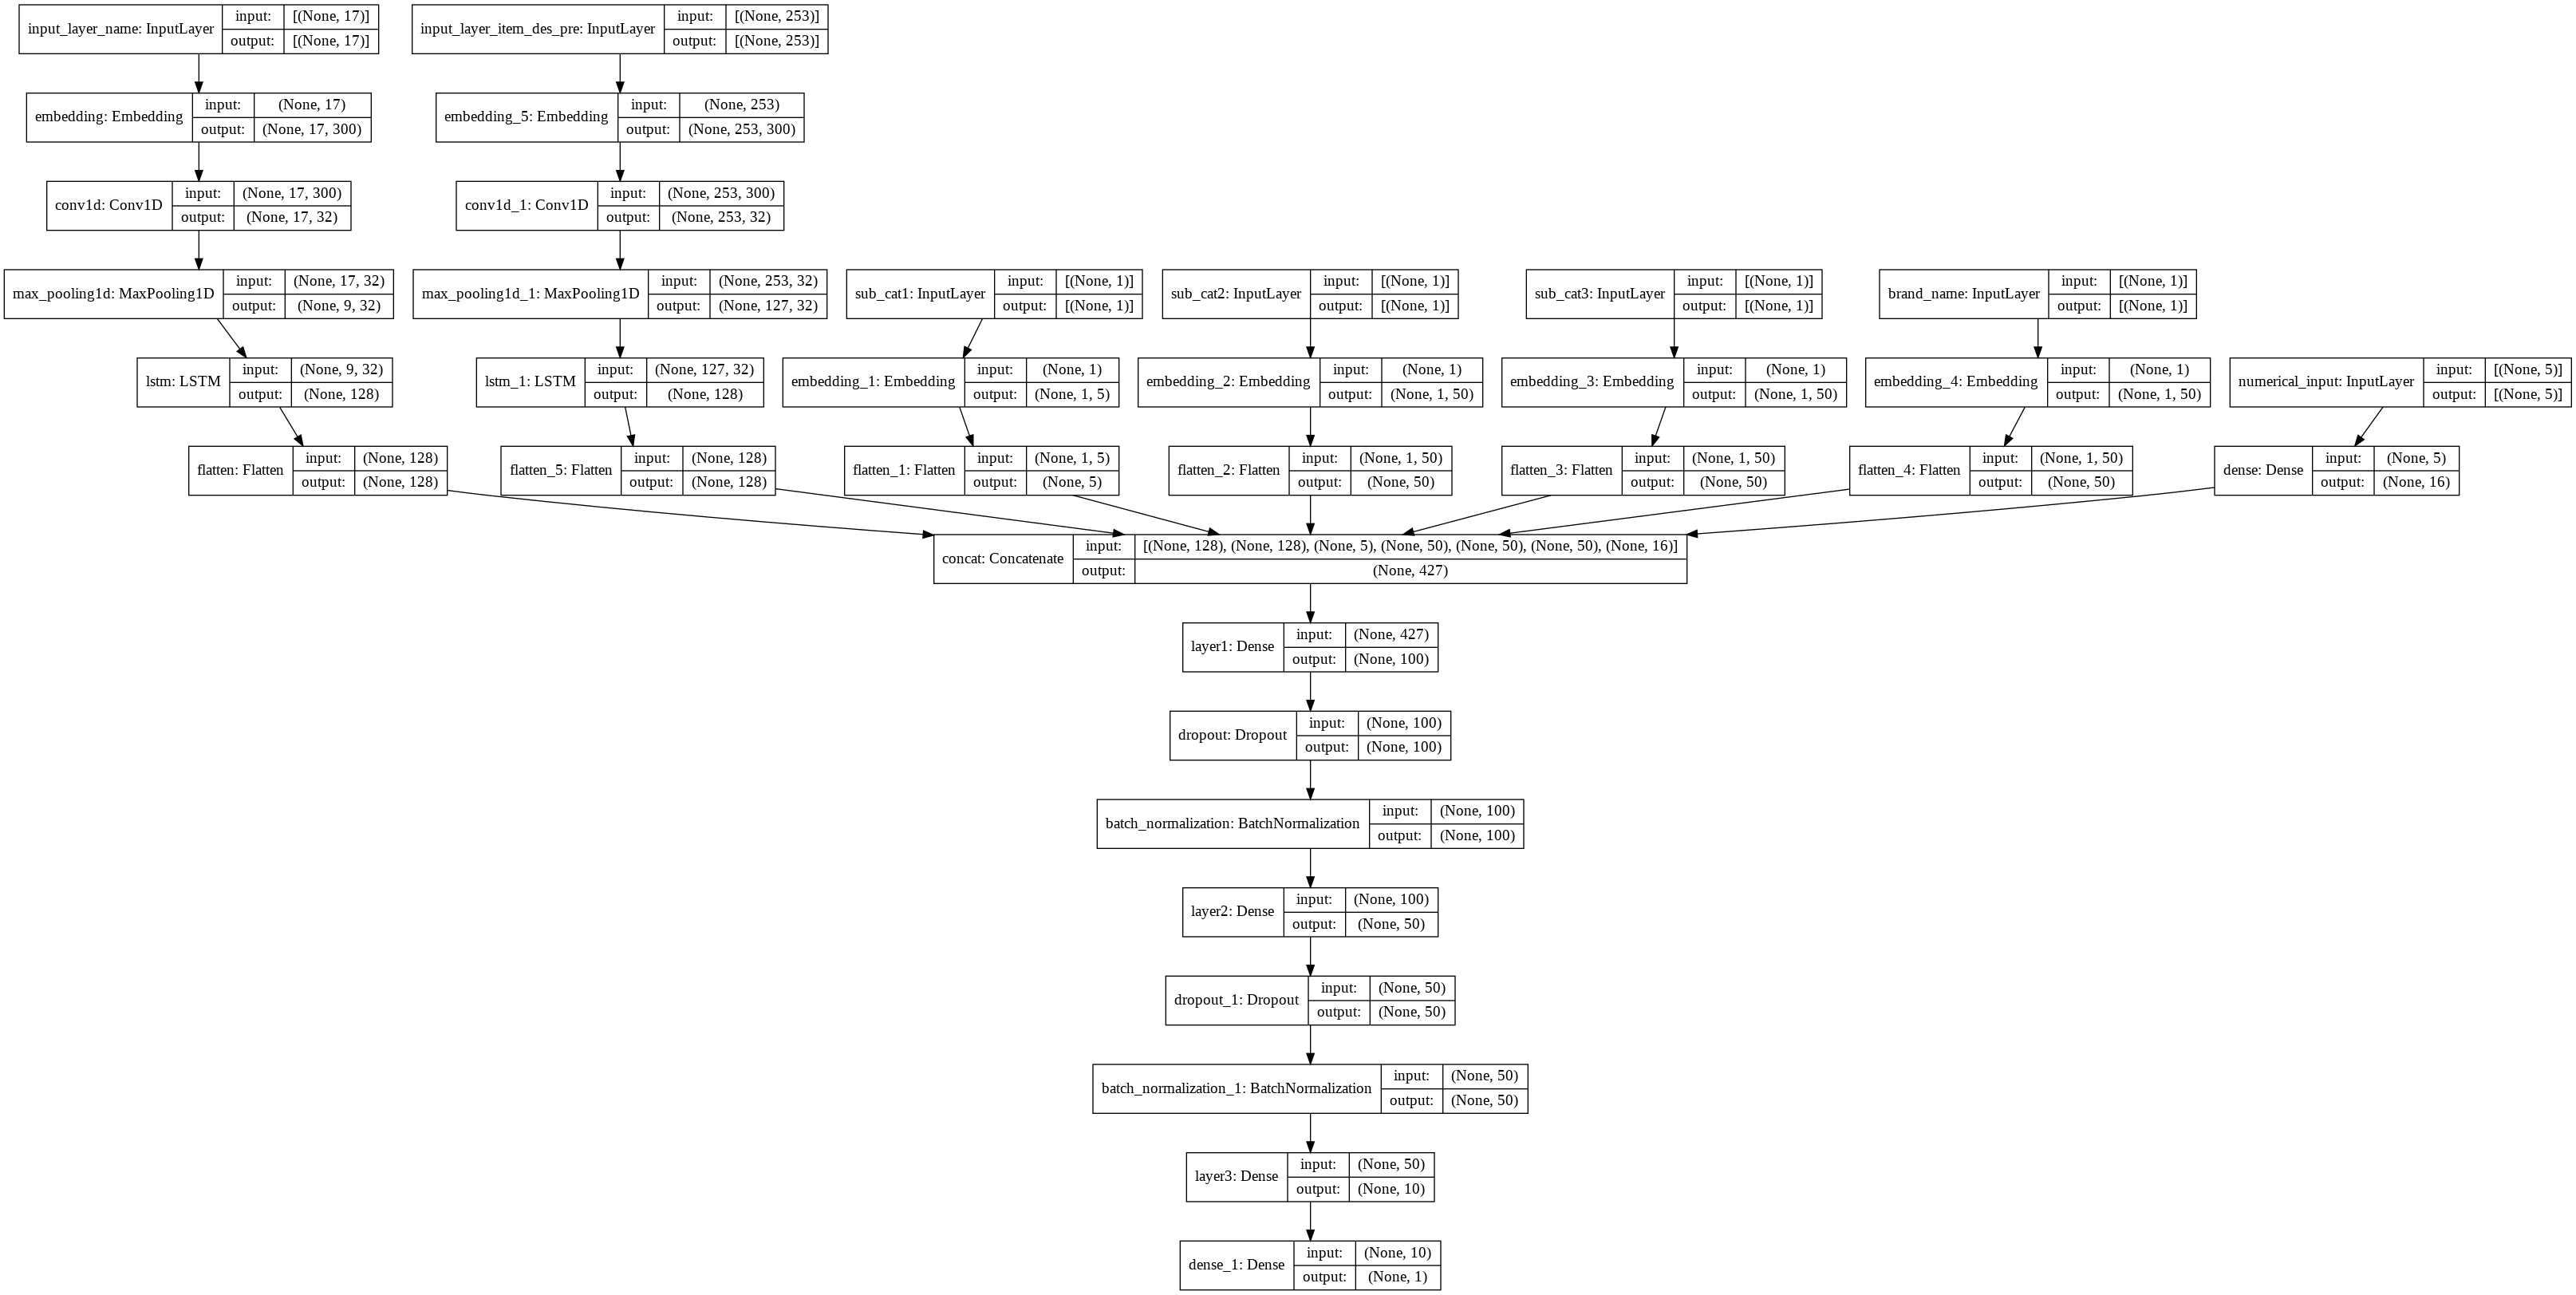

In [62]:
tf.keras.utils.plot_model(model=model, to_file='model_1_plot.png', show_shapes=True)

In [63]:
train_full=[padded_docs_X_train_name,padded_docs_X_train_pre_item_des,X_train_sub_cat1,X_train_sub_cat2,X_train_sub_cat3,X_train_brand_name,X_train_numerical_feat]
            
cv_full=[padded_docs_X_cv_name,padded_docs_X_cv_pre_item_des,X_cv_sub_cat1,X_cv_sub_cat2,X_cv_sub_cat3,X_cv_brand_name,X_cv_numerical_feat]

test_full=[padded_docs_X_test_name,padded_docs_X_test_pre_item_des,X_test_sub_cat1, X_test_sub_cat2,X_test_sub_cat3,X_test_brand_name,X_test_numerical_feat]


In [64]:
len(train_full[0])

1333494

In [65]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=[tf.keras.metrics.RootMeanSquaredError()])



checkpoint1 = ModelCheckpoint(filepath='pavan', monitor='val_loss',verbose=1, save_best_only=True, mode='min')
earlystop1 = EarlyStopping(monitor = 'val_loss',  
                            patience = 4,
                            verbose = 1)


callbacks_1 = [checkpoint1,earlystop1]


In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [66]:
model.fit(train_full,y_train,batch_size=2048,
                        epochs=200,validation_data=(cv_full,y_cv),callbacks=callbacks_1)

Epoch 1/200
652/652 [==============================] - 154s 218ms/step - loss: 1.2282 - root_mean_squared_error: 0.9479 - val_loss: 0.3924 - val_root_mean_squared_error: 0.5292

Epoch 00001: val_loss improved from inf to 0.39240, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 2/200
652/652 [==============================] - 139s 214ms/step - loss: 0.3824 - root_mean_squared_error: 0.5352 - val_loss: 0.3183 - val_root_mean_squared_error: 0.5104

Epoch 00002: val_loss improved from 0.39240 to 0.31832, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 3/200
652/652 [==============================] - 139s 213ms/step - loss: 0.3091 - root_mean_squared_error: 0.5091 - val_loss: 0.2844 - val_root_mean_squared_error: 0.5019

Epoch 00003: val_loss improved from 0.31832 to 0.28438, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 4/200
652/652 [==============================] - 140s 214ms/step - loss: 0.2787 - root_mean_squared_error: 0.4995 - val_loss: 0.2598 - val_root_mean_squared_error: 0.4881

Epoch 00004: val_loss improved from 0.28438 to 0.25983, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 5/200
652/652 [==============================] - 140s 215ms/step - loss: 0.2627 - root_mean_squared_error: 0.4925 - val_loss: 0.2482 - val_root_mean_squared_error: 0.4812

Epoch 00005: val_loss improved from 0.25983 to 0.24816, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 6/200
652/652 [==============================] - 139s 214ms/step - loss: 0.2558 - root_mean_squared_error: 0.4897 - val_loss: 0.2520 - val_root_mean_squared_error: 0.4876

Epoch 00006: val_loss did not improve from 0.24816
Epoch 7/200
652/652 [==============================] - 139s 213ms/step - loss: 0.2477 - root_mean_squared_error: 0.4835 - val_loss: 0.2432 - val_root_mean_squared_error: 0.4801

Epoch 00007: val_loss improved from 0.24816 to 0.24325, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 8/200
652/652 [==============================] - 138s 211ms/step - loss: 0.2441 - root_mean_squared_error: 0.4812 - val_loss: 0.2365 - val_root_mean_squared_error: 0.4742

Epoch 00008: val_loss improved from 0.24325 to 0.23650, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 9/200
652/652 [==============================] - 137s 210ms/step - loss: 0.2388 - root_mean_squared_error: 0.4768 - val_loss: 0.2379 - val_root_mean_squared_error: 0.4766

Epoch 00009: val_loss did not improve from 0.23650
Epoch 10/200
652/652 [==============================] - 137s 210ms/step - loss: 0.2367 - root_mean_squared_error: 0.4754 - val_loss: 0.2352 - val_root_mean_squared_error: 0.4744

Epoch 00010: val_loss improved from 0.23650 to 0.23524, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 11/200
652/652 [==============================] - 137s 210ms/step - loss: 0.2342 - root_mean_squared_error: 0.4734 - val_loss: 0.2402 - val_root_mean_squared_error: 0.4803

Epoch 00011: val_loss did not improve from 0.23524
Epoch 12/200
652/652 [==============================] - 137s 210ms/step - loss: 0.2313 - root_mean_squared_error: 0.4710 - val_loss: 0.2344 - val_root_mean_squared_error: 0.4746

Epoch 00012: val_loss improved from 0.23524 to 0.23440, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 13/200
652/652 [==============================] - 137s 210ms/step - loss: 0.2304 - root_mean_squared_error: 0.4703 - val_loss: 0.2363 - val_root_mean_squared_error: 0.4770

Epoch 00013: val_loss did not improve from 0.23440
Epoch 14/200
652/652 [==============================] - 139s 213ms/step - loss: 0.2295 - root_mean_squared_error: 0.4697 - val_loss: 0.2318 - val_root_mean_squared_error: 0.4725

Epoch 00014: val_loss improved from 0.23440 to 0.23183, saving model to pavan


INFO:tensorflow:Assets written to: pavan/assets


INFO:tensorflow:Assets written to: pavan/assets


Epoch 15/200
652/652 [==============================] - 140s 214ms/step - loss: 0.2275 - root_mean_squared_error: 0.4680 - val_loss: 0.2335 - val_root_mean_squared_error: 0.4744

Epoch 00015: val_loss did not improve from 0.23183
Epoch 16/200
652/652 [==============================] - 138s 212ms/step - loss: 0.2251 - root_mean_squared_error: 0.4655 - val_loss: 0.2410 - val_root_mean_squared_error: 0.4827

Epoch 00016: val_loss did not improve from 0.23183
Epoch 17/200
652/652 [==============================] - 139s 213ms/step - loss: 0.2246 - root_mean_squared_error: 0.4654 - val_loss: 0.2365 - val_root_mean_squared_error: 0.4781

Epoch 00017: val_loss did not improve from 0.23183
Epoch 18/200
652/652 [==============================] - 139s 213ms/step - loss: 0.2242 - root_mean_squared_error: 0.4651 - val_loss: 0.2349 - val_root_mean_squared_error: 0.4767

Epoch 00018: val_loss did not improve from 0.23183
Epoch 00018: early stopping


In [67]:
model_best = tf.keras.models.load_model('pavan')

In [68]:
y_test_pred=np.expm1(model_best.predict(test_full))

In [69]:
y_test_pred

array([[ 6.8585706],
       [10.653565 ],
       [50.568665 ],
       ...,
       [19.945219 ],
       [20.009623 ],
       [19.080456 ]], dtype=float32)

In [70]:
y_test_pred.mean()

22.490904

In [71]:
y_test_pred=y_test_pred.flatten()

In [72]:
y_test_pred

array([ 6.8585706, 10.653565 , 50.568665 , ..., 19.945219 , 20.009623 ,
       19.080456 ], dtype=float32)

In [73]:
submission = pd.DataFrame({'test_id': test_data.test_id, 'price':y_test_pred})

In [74]:
submission.to_csv('/content/drive/MyDrive/pavn/submission.csv', index=False)